In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import requests
from time import sleep
from random import randint
import geopandas as gpd
import geopy
from shapely.geometry import Point
import datetime
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [2]:
derecho911_df = pd.read_csv ('../data/911_Phone_Calls_Derecho.csv')
tornado911_df = pd.read_csv ('../data/911_Phone_Calls_Tornado.csv')
tornado_incidents_df = pd.read_csv ('../data/Dispatch_Data_Tornado_Incidents.csv', skiprows = 3)
derecho_incidents_df = pd.read_csv ('../data/Dispatch_Data_Derecho_Incidents.csv', skiprows = 3)
single_family_housing_df = pd.read_csv('../data/2017 single family_final_with_sqft.txt')
strp_df = pd.read_csv('../data/Residential_Short_Term_rental_Permits.csv', low_memory = False)
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [3]:
strp_df = strp_df.drop(columns = ['Applicant Home Phone' , 'Applicant Mobile Phone' , 'Applicant Work Phone' , 'Applicant Work Phone Ext.' , 'Contact Home Phone' , 'Contact Mobile Phone' , 'Contact Work Phone' , 'Contact Work Phone Ext.' , 'Subdivision / Lot' , 'Permit Owner Addr. 1' , 'Permit Owner Addr. 2' , 'Permit Owner Addr. 3' , 'Permit Owner City' , 'Permit Owner State' , 'Permit Owner ZIP' , 'Permit Subtype' , 'Census Tract'])

In [4]:
strp_df.columns = ['id' , 'applicant' , 'contact' , 'subtype_desc' , 'status' , 'parcel' , 'entered' , 'issued' , 'expiration' , 'address' , 'city' , 'state' , 'zip_code' , 'purpose' , 'permit_owner_name' , 'permit_type' , 'council_district' , 'mapped_location']

In [5]:
strp_df['issued'] = pd.to_datetime(strp_df['issued'], yearfirst = True)
strp_df['year_issued'] = strp_df['issued'].dt.year
strp_df1 = strp_df[strp_df.year_issued == 2019]

In [6]:
strp_df2 = strp_df1.groupby('zip_code')['issued'].count().reset_index()

In [7]:
strp_df2

,zip_code,issued
0,37013,11
1,37027,2
2,37064,1
3,37072,7
4,37076,11
5,37080,5
6,37115,19
7,37138,8
8,37189,5
9,37201,50


In [8]:
incident_type = tornado_incidents_df.groupby("IncidentTypeDescription1")["IncidentDate"].sum()

In [9]:
tornado911_df['Dates'] = pd.to_datetime(tornado911_df['Seizure DateTime']).dt.date
tornado911_df['Time'] = pd.to_datetime(tornado911_df['Seizure DateTime']).dt.time

In [10]:
tornado911_df.head()

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,Dates,Time
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,2020-03-03,00:34:00
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,2020-03-03,00:36:00
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,2020-03-03,00:36:00
3,3/3/2020 0:36,911 Calls,NaN,NaN,526 FOUNDRY DR,2020-03-03,00:36:00
4,3/3/2020 0:36,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,2020-03-03,00:36:00


In [11]:
tornado911_df.drop(columns = ['Seizure DateTime'])

,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,Dates,Time
0,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,2020-03-03,00:34:00
1,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,2020-03-03,00:36:00
2,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,2020-03-03,00:36:00
3,911 Calls,NaN,NaN,526 FOUNDRY DR,2020-03-03,00:36:00
4,911 Calls,36.233467,-86.721077,5007B RUSKIN AVE - N,2020-03-03,00:36:00
...,...,...,...,...,...,...
470,911 Calls,36.142552,-86.635330,WIRELESS CALLER,2020-03-03,04:54:00
471,911 Calls,36.189415,-86.813557,WIRELESS CALLER,2020-03-03,04:54:00
472,911 Calls,36.223534,-86.757874,WIRELESS CALLER,2020-03-03,04:55:00
473,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE,2020-03-03,04:56:00


<AxesSubplot:>

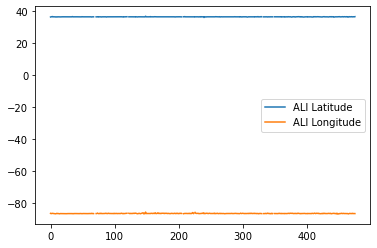

In [12]:
tornado911_df.plot()

In [13]:
derecho911_df['Dates'] = pd.to_datetime(derecho911_df['Seizure DateTime']).dt.date
derecho911_df['Time'] = pd.to_datetime(derecho911_df['Seizure DateTime']).dt.time

In [14]:
derecho911_df.drop(columns = ['Seizure DateTime'])

,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,Dates,Time
0,911 Calls,36.247802,-86.716847,WIRELESS CALLER,2020-05-03,16:30:00
1,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,2020-05-03,16:30:00
2,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,2020-05-03,16:30:00
3,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW,2020-05-03,16:30:00
4,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE,2020-05-03,16:31:00
...,...,...,...,...,...,...
1544,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S,2020-05-04,00:18:00
1545,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE,2020-05-04,00:22:00
1546,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW,2020-05-04,00:25:00
1547,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,2020-05-04,00:29:00


In [15]:
derecho911_df.isna().any()

Seizure DateTime      False
CallTypeId            False
ALI Latitude           True
ALI Longitude          True
Cell Tower Address     True
Dates                 False
Time                  False
dtype: bool

<AxesSubplot:>

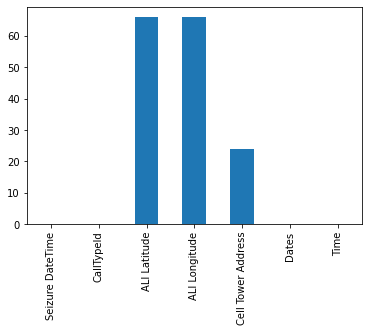

In [16]:
derecho911_df.isna().sum().plot(kind="bar")

In [17]:
tornado911_df.isna().any()

Seizure DateTime      False
CallTypeId            False
ALI Latitude           True
ALI Longitude          True
Cell Tower Address     True
Dates                 False
Time                  False
dtype: bool

<AxesSubplot:>

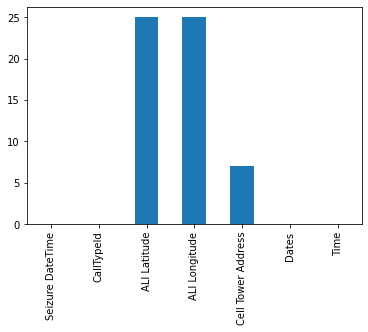

In [18]:
tornado911_df.isna().sum().plot(kind="bar")

In [19]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


# Mapping markers

In [44]:
derecho911_df['ALI Latitude'] = derecho911_df['ALI Latitude'].fillna(0)
derecho911_df['ALI Longitude'] = derecho911_df['ALI Longitude'].fillna(0)
##Turn NaNs into zeroes
derecho911_df['LatLong'] = derecho911_df.apply(lambda row: [row['ALI Latitude'], row['ALI Longitude']], axis=1)
##Make a latLong column which contains an array which is the form required for map markers
test_map = folium.Map(location=[36.247802, -86.716847], zoom_start=10)
##This is an arbitrary location within Nashville to start; this could be more centered
folium.TileLayer('stamentoner').add_to(test_map)
for location in derecho911_df['LatLong']:
    folium.Marker(location=location).add_to(test_map)
test_map

In [21]:
derech_not_nans = derecho911_df['ALI Latitude'].notna()
derecho911_df = derecho911_df[derech_not_nans]

In [22]:
derecho911_df

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address,Dates,Time,LatLong
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,2020-05-03,16:30:00,"[36.247802, -86.716847]"
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,2020-05-03,16:30:00,"[36.143108000000005, -86.80062099999999]"
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,2020-05-03,16:30:00,"[36.100516, -87.056329]"
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW,2020-05-03,16:30:00,"[36.130021, -86.927819]"
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE,2020-05-03,16:31:00,"[36.142379999999996, -86.88188199999999]"
...,...,...,...,...,...,...,...,...
1544,5/4/2020 0:18,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S,2020-05-04,00:18:00,"[36.131694, -86.770535]"
1545,5/4/2020 0:22,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE,2020-05-04,00:22:00,"[36.042237, -86.74345500000001]"
1546,5/4/2020 0:25,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW,2020-05-04,00:25:00,"[36.077664, -86.65560699999999]"
1547,5/4/2020 0:29,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,2020-05-04,00:29:00,"[36.024706, -86.743562]"


In [23]:
single_family_housing_df

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2017 LAND,2017 IMPR,2017 TOTAL APPR,2017 TOTAL ASSD,FinishedArea
0,103020C01300CO,USD,24,276 WHITE BRIDGE PIKE 13,NASHVILLE,37209,10000,39600,49600,19840,567.0
1,103020C01400CO,USD,24,276 WHITE BRIDGE PIKE 14,NASHVILLE,37209,10000,45000,55000,13750,567.0
2,103020C01500CO,USD,24,276 WHITE BRIDGE PIKE 15,NASHVILLE,37209,10000,39600,49600,19840,567.0
3,103020C01600CO,USD,24,276 WHITE BRIDGE PIKE 16,NASHVILLE,37209,10000,45000,55000,13750,567.0
4,103020C01700CO,USD,24,276 WHITE BRIDGE PIKE 17,NASHVILLE,37209,10000,45000,55000,22000,567.0
...,...,...,...,...,...,...,...,...,...,...,...
197109,188100A12100CO,GSD,33,1709 PARK TERRACE LN,NOLENSVILLE,37135,48000,286600,334600,83650,2831.0
197110,188100A12200CO,GSD,33,1713 PARK TERRACE LN,NOLENSVILLE,37135,48000,289400,337400,84350,2774.0
197111,188100A12300CO,GSD,33,1717 PARK TERRACE LN,NOLENSVILLE,37135,48000,360800,408800,102200,3222.0
197112,188100A12400CO,GSD,33,2104 GLEN HAVEN DR,NOLENSVILLE,37135,33000,187300,220300,55075,1952.0


In [24]:
single_family_housing_df = single_family_housing_df.rename(columns={'AddressPostalCode':'Zipcode', 'AddressFullAddress':'Address'})

In [25]:
#zipcodes.plot()

In [26]:
#leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
#            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

#zipcodes.plot(column = 'zip', figsize=(10, 10),
#              edgecolor = 'black',
 #             legend = True, legend_kwds = leg_kwds, 
  #            cmap = 'Set2')
#plt.show()

In [27]:
building_permits_df = pd.read_csv ('../data/Building_Permits_Issued.csv', low_memory = False)

In [28]:
building_permits_df = building_permits_df.drop(columns = ['Subdivision / Lot','Permit Type','Permit Subtype','IVR Tracking #','Census Tract'])

In [29]:
building_permits_df = building_permits_df.rename(columns = {'Permit #': 'permit_num', 'Permit Type Description': 'type_desc', 'Permit Subtype Description': 'subtype_desc',
           'Parcel': 'parcel', 'Date Entered': 'date_entered',  
            'Date Issued': 'date_issued', 'Construction Cost': 'cost', 'Address': 'address','City':'city','State':'state','ZIP':'zipcode','Contact':'contact','Purpose':'purpose','Council District':'council_district','Mapped Location':'mapped_location'})

In [30]:
building_permits_df

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017009328,Building Use & Occupancy,"Accessory Structure, Pools",062020B17400CO,02/08/2017,02/08/2017,8000.0,3076 DELTA QUEEN DR,NASHVILLE,TN,37214,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,to install an oval in ground swimming pool wit...,15.0,"3076 DELTA QUEEN DR\nNASHVILLE, TN 37214\n(36...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34501,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,"ALFORD BUILDERS, LLC",to construct 2 story addition which will add 1...,6.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34502,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34503,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,sergy motorny,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34504,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,GENERAL SIGN SERVICES,to erect 28SF illuminated wall sign for Famous...,19.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."


In [31]:
def add_lat_lng(df): 
        lat_lng = pd.DataFrame(df['mapped_location'].apply(lambda s: s[s.find("(")+1:s.find(")")].split(', ')))
        lat_lng_df = lat_lng['mapped_location'].apply(pd.Series)  
        print(lat_lng_df.head())
        lat_lng_df.columns = ['lat', 'lng'] 
        df = pd.concat([df, lat_lng_df], axis = 1) 
        return df

In [32]:
#building_permits_df = add_lat_lng(building_permits_df)

In [33]:
building_permits_df

,permit_num,type_desc,subtype_desc,parcel,date_entered,date_issued,cost,address,city,state,zipcode,contact,purpose,council_district,mapped_location
0,2019067152,Building Demolition Permit,Demolition Permit - Residential,06106005200,11/01/2019,11/01/2019,6000.0,600 MAPLEWOOD LN,NASHVILLE,TN,37216,CONTRERAS DESIGN BUILD LLC,to demolish existing residence and detached st...,8.0,"600 MAPLEWOOD LN\nNASHVILLE, TN 37216\n(36.228..."
1,2019011084,Building Use & Occupancy,"Multifamily, Townhome",051100J90000CO,02/25/2019,07/22/2019,0.0,812 BRIAR CIR,MADISON,TN,37115,COLE INVESTMENTS LLC,MASTER PERMIT ONLY� � NO CONSTRUCTION� �MULTI-...,8.0,"812 BRIAR CIR\nMADISON, TN 37115"
2,2019011479,Building Commercial - Rehab,Restaurant (Full Service),11714005500,02/27/2019,07/22/2019,759670.0,2171 GREEN HILLS VILLAGE DR,NASHVILLE,TN,37215,"BATTINO CONTRACTING SOLUTIONS, LLC",2475 sq.ft. build out of CAVA RESTURANT to inc...,25.0,"2171 GREEN HILLS VILLAGE DR\nNASHVILLE, TN 372..."
3,2019039568,Building Residential - New,Single Family Residence,085040A40800CO,07/03/2019,07/22/2019,300888.0,4327 STONE HALL BLVD,HERMITAGE,TN,37076,MERITAGE HOMES OF TENNESSEE INC,New Single Family construction - Total Sq foot...,14.0,"4327 STONE HALL BLVD\nHERMITAGE, TN 37076"
4,2017009328,Building Use & Occupancy,"Accessory Structure, Pools",062020B17400CO,02/08/2017,02/08/2017,8000.0,3076 DELTA QUEEN DR,NASHVILLE,TN,37214,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,to install an oval in ground swimming pool wit...,15.0,"3076 DELTA QUEEN DR\nNASHVILLE, TN 37214\n(36...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34501,2018065491,Building Residential - Addition,Single Family Residence,08307030200,10/16/2018,10/30/2018,161540.0,2212 EASTLAND AVE,NASHVILLE,TN,37206,"ALFORD BUILDERS, LLC",to construct 2 story addition which will add 1...,6.0,"2212 EASTLAND AVE\nNASHVILLE, TN 37206\n(36.18..."
34502,2017019524,Building Residential - Addition,Single Family Residence,04313027400,03/22/2017,03/22/2017,20000.0,316 CHERRY ST,MADISON,TN,37115,SELF CONTRACTOR RESIDENTIAL (SEE APPLICANT INF...,EXISTING ONE STORY HOUSE.\nTHIS PERMIT:\n1...N...,9.0,"316 CHERRY ST\nMADISON, TN 37115\n(36.258694, ..."
34503,2018008218,Building Commercial - Rehab,"General Office, Professional Services",03409008400,02/13/2018,04/17/2018,14000.0,131 EDENWOLD RD,MADISON,TN,37115,sergy motorny,BUILDING AT 2100 SQFT WITH UNFINISH ATTIC AT A...,10.0,"131 EDENWOLD RD\nMADISON, TN 37115\n(36.287001..."
34504,2017044878,Building Sign Permit,Sign - Ground / Wall Signs,09306208500,07/10/2017,08/23/2017,5000.0,110 2ND AVE N,NASHVILLE,TN,37201,GENERAL SIGN SERVICES,to erect 28SF illuminated wall sign for Famous...,19.0,"110 2ND AVE N\nNASHVILLE, TN 37201\n(36.162296..."


In [34]:
test_latlong = '276 WHITE BRIDGE PIKE'
HOST1 = 'https://nominatim.openstreetmap.org/search?q=' + test_latlong + '&format=json&polygon=1&addressdetails=1'
req = requests.get(HOST1)
req.json()

[{'place_id': 266422510,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 245915270,
  'boundingbox': ['36.142839', '36.142939', '-86.857613', '-86.857513'],
  'lat': '36.142889',
  'lon': '-86.857563',
  'display_name': '276, White Bridge Pike, West Nashville, Richland, Nashville-Davidson, Davidson County, Tennessee, 37209, United States of America',
  'class': 'place',
  'type': 'house',
  'importance': 0.411,
  'address': {'house_number': '276',
   'road': 'White Bridge Pike',
   'neighbourhood': 'West Nashville',
   'hamlet': 'Richland',
   'city': 'Nashville-Davidson',
   'county': 'Davidson County',
   'state': 'Tennessee',
   'postcode': '37209',
   'country': 'United States of America',
   'country_code': 'us'}}]

In [35]:
def location_retrieve(addresses_in_nash):  ##A list of two-tuples (index, Cell Tower Address)
    locations = {}
    for ind, address in addresses_in_nash:
        piked_address = address.replace('PKE', 'PIKE', 1)
        HOST = 'https://nominatim.openstreetmap.org/search?q='
        HOST = HOST + piked_address
        HOST = HOST + ',Tennessee&format=json&polygon=1&addressdetails=1'
        req = requests.get(HOST)
        req_dict_list = req.json()        
        if len(req_dict_list) > 0:
            ##print(str(req_dict_list))
            result_dict = {}
            result_dict['zip'] = req_dict_list[0]['address']['postcode']
            if 'city' in req_dict_list[0]['address']:                
                result_dict['city'] = req_dict_list[0]['address']['city']
            elif 'village' in req_dict_list[0]['address']:
                result_dict['city'] = req_dict_list[0]['address']['village']
            else:
                result_dict['city'] = req_dict_list[0]['address']['hamlet']
            if 'neighbourhood' in req_dict_list[0]['address']:
                result_dict['hood'] = req_dict_list[0]['address']['neighbourhood']
            else:
                result_dict['hood'] = np.nan
            result_dict['lat'] = req_dict_list[0]['lat']
            result_dict['lon'] = req_dict_list[0]['lon']
            locations[ind] = result_dict
        else:
            locations[ind] = {'zip': 0, 'city': '', 'lat': 0.0, 'lon': 0.0}
        sleep(randint(1,4))
    return locations

#### TEST function using sample data ####
some_addresses = [(5,'5600 OBRIEN AV'), (82, '4220 HARDING PKE')]
locations = location_retrieve(some_addresses)


In [38]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]
print(zipcodes)

      zip         po_name                                           geometry
0   37115         MADISON  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...
1   37216       NASHVILLE  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...
2   37204       NASHVILLE  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...
3   37027       BRENTWOOD  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...
4   37064        FRANKLIN  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...
5   37143          PEGRAM  MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ...
6   37080         JOELTON  MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ...
7   37221       NASHVILLE  MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ...
8   37072  GOODLETTSVILLE  MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ...
9   37212       NASHVILLE  MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ...
10  37135     NOLENSVILLE  MULTIPOLYGON (((-86.67188 35.98955, -86.67189 ...
11  37027       BRENTWOOD  MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...

In [39]:
def integrate_latlon(nan_df, df, address_col, lat_col, lon_col):  ## input dataframe and the string values for the column names
    loc = location_retrieve(zip(nan_df.index, nan_df[address_col]))
    for ind in loc:
        df.at[ind, lat_col] = loc[ind]['lat']
        df.at[ind, lon_col] = loc[ind]['lon']
    return df

In [41]:
single_family_housing_df['geometry'] = single_family_housing_df.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
bus_stops.head(3)

AttributeError: 'Series' object has no attribute 'lng'

In [ ]:
#locator = Nominatim(user_agent="myGeocoder")
#location = locator.geocode("Champ de Mars, Paris, France")

In [ ]:
#from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
#geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
#single_family_housing_df['location'] = single_family_housing_df['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
#single_family_housing_df['point'] = single_family_housing_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
#single_family_housing_loc[['latitude', 'longitude', 'altitude']] = pd.DataFrame(single_family_housing_loc['point'].tolist(), index=df.index)